![Curso de Visión Artificial](imagenes/encabezado.png)




# Aprendizaje de Máquina

El aprendizaje automático o aprendizaje de máquinas (del inglés, machine learning) es una rama de la inteligencia artificial cuyo objetivo es desarrollar técnicas que permitan a las computadoras aprender.

En general, un problema de aprendizaje de máquina considera un conjunto de `n` muestras de datos (u objetos) y luego intenta predecir las propiedades de datos (u objetos) desconocidos.

Los problemas de aprendizaje automático se dividen, de manera muy general, en dos categorías: aprendizaje supervisado y aprendizaje NO supervisado.

## Aprendizaje supervisado

Los algoritmos de aprendizaje supervisado requieren de un conjunto de datos conocidos (denominado conjunto de datos de entrenamiento) a partir del cual se crea un **modelo** para predecir el valor de una variable de salida. El aprendizaje supervisado se puede usar en dos tareas: clasificación o regresión.

- **Clasificación:** en este caso la variable de salida es una etiqueta que determina la clase a la que pertenecen los datos de entrada, es decir, la variable de salida es una **variable discreta**. Así, los algoritmos supervisados aprenden, a partir de los datos de entrada, a predecir la etiqueta de clase de un dato desconocido (sin etiquetar). Por ejemplo, una tarea de clasificación consiste en determinar el género de una persona a partir de su peso, su edad y su estatura. En este caso, la variable de salida es el género.
- **Regresión:** en este caso los algoritmos de aprendizaje buscan predecir el valor de una **variable continua** a partir de los datos de entrada. Un ejemplo de una tarea de regresión es el de estimar la longitud de un salmón en función de su edad y su peso.


## Aprendizaje no supervisado

Por otro lado, en el aprendizaje supervisado se cuenta con un conjunto de datos de entrenamiento, aunque no hay una variable específica de salida. En este sentido, el objetivo de los problemas del aprendizaje no supervisado es, por ejemplo, el de agrupar los datos de entrada con base en algún criterio de similitud o disimilitud o determinar la distribución estadística de los datos, conocida como estimación de la densidad.



<div style="padding:10px; border-radius:10px; border:2px solid #A43D39; background:#EEEEEE">
<span style="color:#A43D39"><h3>**Nota:**</h3></span> En nuestro caso nos centramos en los problemas de clasificación, es decir, en usaremos los algoritmos del paradigma de aprendizaje supervisado. Específicamente, usaremos los algoritmos implementados en `sklearn`. </div>

## Acerca de Scikit-learn

`Scikit-Learn` es una biblioteca para Python que provee acceso a diferentes algoritmos de aprendizaje automático a través de una API que ha sido creada por cientos de colaboradores de todo el mundo.

`Scikit-Learn` está basado en `NumPy` y `SciPy`, y se debe tener presente que como tal, no está diseñado específicamente para trabajar con conjuntos de datos extremadamente grandes, aunque hay algo de trabajo en esta área.

En esta práctica trabajaremos con conjuntos de datos pequeños para entrenar algunos algoritmos de aprendizaje supervisado para realizar tareas de clasificación de datos.

Empecemos entonces ...

In [1]:
# Siempre que usemos matplotlib en Jupyter es necesario poner esta línea antes de cualquier otra
%matplotlib inline

# Importamos las bibliotecas necesarias y les asignamos un alias
import skimage                           # Biblioteca para la manipulación de imágenes
import numpy as np                       # Biblioteca para la manipulación de matrices

# Importamos algunos paquetes específicos
from matplotlib import pyplot as plt     # Biblioteca para crear gráficas y mostrar las imágenes en pantalla

from skimage import data                 # Paquete con imágenes de prueba
from skimage import io                   # Paquete para lectura/escritura de imágenes
from skimage import color                # Paquete con las operaciones de transformaciones entre espacios de color
from skimage import exposure             # Paquete con las funciones para calcular y alterar el histograma
from skimage import filters              # Paquete que contiene las máscaras y filtros de suavizado y realzado
from skimage import util                 # Paquete que contiene las funciones para cambiar el tipo de dato de las imágenes
from skimage import morphology           # Para crear el kernel de convolución en los filtros no lienales
from skimage import transform            # Esta biblioteca es la que contiene la implementación de Hough
from skimage import measure              # Esta biblioteca contiene el método de etiquetado de regiones
from skimage import feature              # Esta biblioteca es la que contiene la implementación del canny

from scipy import ndimage                # Usamos esta biblioteca para realizar la operación de convolución
import skdemo                            # Paquete ESPECIAL ADJUNTO con algunas funciones extra de visualización

###########################

from scipy.stats import kde              # Esta biblioteca es necesaria para estimar la función de densidad de los datos
from sklearn import preprocessing        # Este paquete contiene las funciones de preprocesamiento de datos
from sklearn import feature_selection    # Este paquete contiene los métodos de selección de características de sklearn
from sklearn import svm                  # Este paquete contiene las funciones de un clasificador SVM
from sklearn import model_selection      # Este paquete contiene las funciones de particionamiento de datos y validación cruzada
from sklearn import metrics              # Este paquete contiene las funciones para evaluar un clasificador
from sklearn import neighbors  
from sklearn import discriminant_analysis
from sklearn import cluster
from sklearn import naive_bayes
from sklearn import tree

# Con este nos aseguramos que las imágenes en niveles de gris, se vean como tal siempre.
# Reiniciamos los parámetros de visualización
plt.rcParams.update(plt.rcParamsDefault)

plt.rcParams['image.cmap'] = 'gray'
plt.rcParams['image.interpolation'] = 'none'


import pandas as pd
import seaborn as sns;


## El Conjunto de Datos

La mayoría de los algoritmos de aprendizaje implementados en `Scikit-Learn` esperan que los datos se almacenen en una matriz. Las matrices pueden ser matrices `Numpy` o, en algunos casos, matrices `scipy.sparse`.

En general, se espera que el tamaño de la matriz sea [n_samples, n_features], donde 
- **n_samples** es el número de muestras: cada muestra es un elemento (u objeto) para procesar (por ejemplo, clasificar). Una muestra puede ser un documento, las características extraídas de un objeto en una imagen, las características de un sonido o la información de un objeto astronómico o una fila en una base de datos relacional, entre otros. En general, cada fila contiene la descripción de un objeto a partir de un conjunto fijo de rasgos cuantitativos.
- **n_features** es la cantidad de características o rasgos distintos que se pueden usar para describir cada elemento de forma cuantitativa. Las características son generalmente de valor real, pero pueden ser booleanas o de valor discreto en algunos casos.

En algunos casos la matriz de características puede ser altamente dimensional (miles de características). Sin embargo, cuando la mayoría de las características tienen un valor de 0 para los objetos se dice que la matriz es dispersa y, por tanto, se deben usar matrices del tipo `scipy.sparse`. Este tipo de matrices son mucho más eficientes en memoria que las matrices `Numpy`.

Entonces, para efectos prácticos, los algoritmos de aprendizaje supervisado requieren la matriz con los datos de entrenamiento, a la que llamaremos `X` en toda la práctica, además de un con las etiquetas de clase de cada muestra de la matriz, a la que llamaremos `y`; como ejemplifica la imagen a continuación:

![Datos de Entrenamiento](imagenes/data-layout.png)

Imagen tomada del Libro [Python Data Science Handbook](https://github.com/jakevdp/PythonDataScienceHandbook)
<br/>



### Usemos un  conjunto de datos conocido: Iris

Como ejemplo de un conjunto de datos simple, vamos a echar un vistazo a los datos del Iris el cual consiste en  mediciones de tres especies diferentes de lirios. Por lo tanto, la tarea consiste en determinar la especie de lirio  dado un conjunto de mediciones. 

Características en el conjunto de datos Iris:
* Longitud del sépalo en cm
* Ancho del sépalo en cm
* Longitud del pétalo en cm
* Ancho del pétalo en cm

Clases objetivo para predecir:
* Iris Setosa - Clase 0
* Iris Versicolour - Clase 1
* Iris Virginica - Clase 2


Empecemos cargando el conjunto de datos.

In [2]:
# Cargamos el conjunto de datos
from sklearn import datasets
iris = datasets.load_iris()


In [3]:
# Sacamos la información que nos interesan, en este caso la matriz de datos y las etiquetas
X = iris.data
y = iris.target

# Obtenemos los nombres de las características
Xn = iris.feature_names

# Obtenemos los nombres de las clases
clases = iris.target_names

# Número de muestras y de características
n_samples, n_features = X.shape

# Visualicemos la matriz de datos y el vector
print("Número de Objetos: ", n_samples)
print("Número de Características: ", n_features)

Número de Objetos:  150
Número de Características:  4


In [4]:
# Visualicemos la información de la primera muestra
print("Primera muestra:")
print(Xn)
print(X[0,:])

Primera muestra:
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
[5.1 3.5 1.4 0.2]


### Visualizando el Conjunto de Datos

Como el conjunto de datos es pequeño, podemos darnos a la tarea de analizar cada característica de manera individual. En este caso visualizaremos las distribuciones estadísticas de los datos.

Para ello, visualicemos las características por parejas. En este caso, vamos a utilizar una biblioteca llamada <span style="background-color:#DDDDDD; color:blue; font-family:Courier new">seaborn</span>, la cual se especializa en la visualización de datos. Debe tener presente que <span style="background-color:#DDDDDD; color:blue; font-family:Courier new"> seaborn </span> está hecho para visualizar datos del tipo `DataFrame`, por tanto, debemos convertir nuestra matriz de datos a este tipo de estructura. 

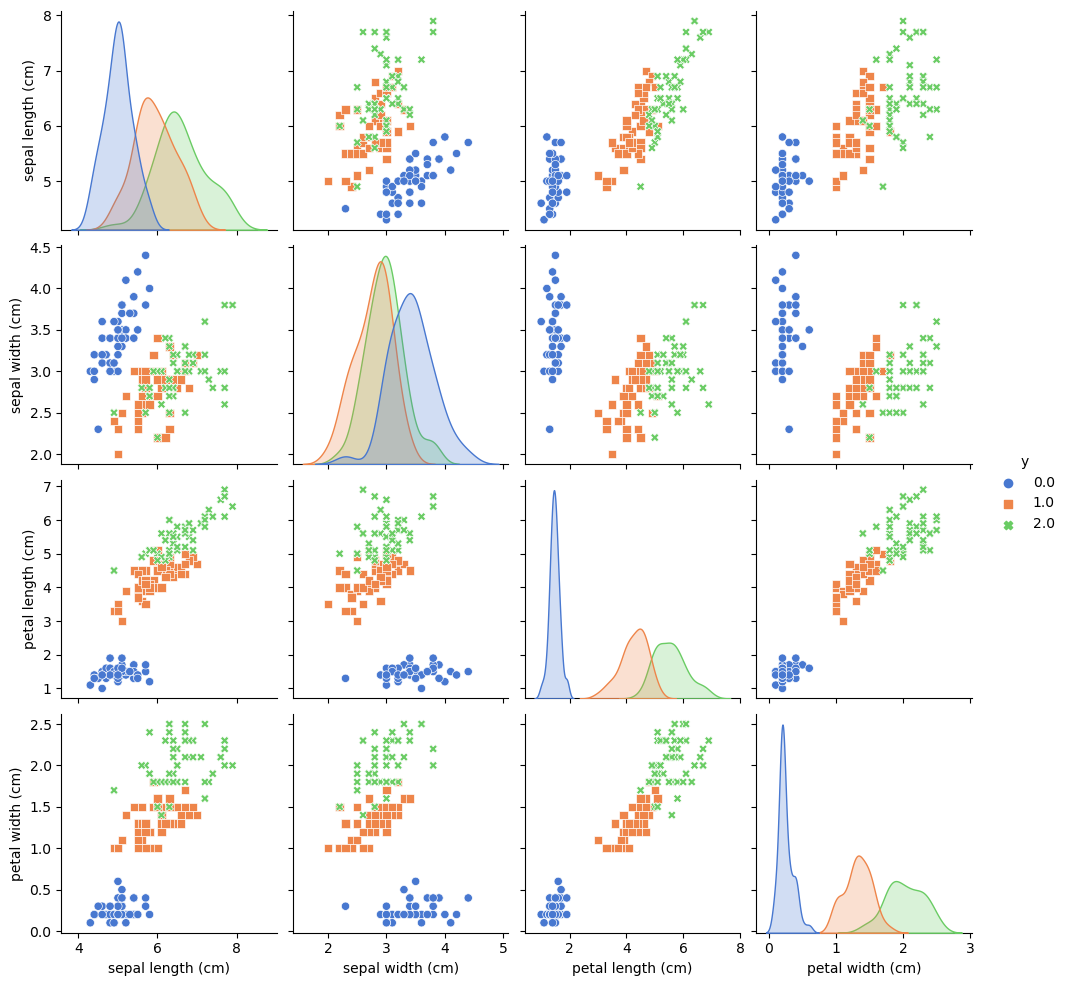

In [5]:
# Empezamos juntando el vector de etiquetas al conjunto de datos
a = np.hstack((X,y[:,None]))

# Craemos una estructura llamada DataFrame con los datos y los nombres de las características
df = pd.DataFrame(data=a, columns=np.hstack((Xn, ['y'])))
                  
# Usamos el paquete seaborn para visualizar las características
sns.pairplot(df, diag_kind='kde', hue="y", markers=["o", "s", "X"], palette="muted")
plt.show()

## Datos de Entrenamiento y Datos de Prueba

Ya que hemos cargado y analizado el conjunto de datos, procedemos a partir el conjunto de datos en dos: un conjunto para entrenar nuestros algoritmos de clasificación y un conjunto para probar la precisión de dichos algoritmos.


<div style="padding:10px; border-radius:10px; border:2px solid #4BACC6; background:#EEEEEE">
<span style="color:#4BACC6" ><h3>Conjuntos de Entrenamiento y de Prueba</h3></span> <br/>Como ya se ha mencionado, en el  aprendizaje automático se busca aprender algunas propiedades de un conjunto de datos y luego probar esas propiedades en comparación con otro conjunto de datos. Una práctica común consiste en evaluar un algoritmo dividiendo el conjunto de datos en dos. Llamamos a uno de esos conjuntos el **conjunto de entrenamiento**, y es el conjunto a partir del cual  aprendemos; Llamamos al otro conjunto el **conjunto de pruebas**, y es el conjunto en el que probamos lo que el algoritmo ha aprendido. </div>


La manera más simple de dividir un conjunto de datos es usar la función de particionamiento de sklearn llamada <span style="background-color:#DDDDDD; color:blue; font-family:Courier new">train_test_split</span>. Esta función recibe como parámetros el conjunto de datos (X), las etiquetas de clase (y), el tamaño del conjunto de prueba (o de entrenamiento) y, como parámetro opcional, la semilla para hacer la partición aleatoria. 

Tenga presente qué al fijar una semilla, la partición del conjunto de datos siempre será la misma.

Particionemos nuestro conjunto de datos:


In [6]:
# La función retorna 4 conjuntos, la división en 2 de X e Y:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.33, random_state=10)

## Métodos de Clasificación Supervisados

Veamos algunos métodos de clasificación supervisados:
- Clasificador kNN (k vecinos más cercanos)
- Clasificador Lineal: LDA
- Clasificador Cuadrático: QDA
- Máquinas de Vectores de Soporte (SVM)

### Clasificador de Vecinos más Cercanos (kNN)

Este es quizá el clasificador más fácil de entender: el algoritmo clasifica un dato desconocido de acuerdo a la etiqueta de clase que tienen sus k vecinos más cercanos. Para ello, el algoritmo calcula la distancia del dato desconocido a cada uno de los ejemplos del conjunto de entrenamiento, luego, se ordenan dichas distancias de menor a mayor y se seleccionan las k primeras. La etiqueta de clase del dato desconocido es la de mayor frecuencia entre sus k vecinos.

![Datos de Entrenamiento](imagenes/KNN.webp)

Normalmente, el clasificador de vecinos más cercanos utiliza la **distancia euclidiana**, sin embargo, otro tipo de distancias, como la **distancia mahalanobis** o la **distancia Minkowski**, pueden ser usadas.

Veamos como usar este clasificador.

In [7]:
# Primero definimos el clasificador y sus parámetros
# En este caso estamos usando una distancia euclidiana y 3 vecinos
clf_knn = neighbors.KNeighborsClassifier(n_neighbors=3)

# Después ajustamos el clasificador a los datos de entrenamiento (aprendemos de los datos)
clf_knn.fit(X_train, y_train)

# A continuación, usamos el clasificador entrenado para predecir la etiqueta de los datos de prueba
y_predicted = clf_knn.predict(X_test)

# Ahora podemos calcular y ver la precisión del clasificador
acc = metrics.accuracy_score(y_test, y_predicted)
mat = metrics.confusion_matrix(y_test, y_predicted)

print ("Precisión del clasificador kNN: ",acc)
print ("Matriz de Confusión: \n", mat)

Precisión del clasificador kNN:  0.96
Matriz de Confusión: 
 [[15  0  0]
 [ 0 17  2]
 [ 0  0 16]]


### Clasificador Lineal LDA:

LDA es un clasificador lineal que se obtiene al ajustar la probabilidad condicional de cada clase a una distribución Gaussiana con una media y una matriz de covarianzas determinadas, ambas, calculadas a partir de los datos de entrenamiento. Para el caso de este clasificador, se asume que la matriz de covarianzas es diagonal y que la varianza es igual para todas las clases (El caso más simple).

![Clasificador LDA](imagenes/lda.png)

LDA es uno de los clasificadores obtenidos a partir del teorema de Bayes, asumiendo distribuciones Gaussianas:

![PDF_Gaussiana](imagenes/Gauss_1.png)

Aplicando el logaritmo (que es una función monótona creciente) las funciones discriminantes toman la forma:

![Discriminante](imagenes/Gauss_2.png)

Aplicando el logaritmo sobre la distribución gaussiana tenemos:

![Discriminante](imagenes/Gauss_3.png)

Finalmente, cómo se asume que todas las clases tienen la misma varianza, la fórmula se resume a:

![Discriminante](imagenes/Gauss_4.png)

Veamos como usar este clasificador.

In [8]:
# Primero definimos el clasificador y sus parámetros
clf_lda = discriminant_analysis.LinearDiscriminantAnalysis()

# Después ajustamos el clasificador a los datos de entrenamiento (aprendemos de los datos)
clf_lda.fit(X_train, y_train)

# A continuación, usamos el clasificador entrenado para predecir la etiqueta de los datos de prueba
y_predicted = clf_lda.predict(X_test)

# Ahora podemos calcular y ver la precisión del clasificador
acc = metrics.accuracy_score(y_test, y_predicted)
mat = metrics.confusion_matrix(y_test, y_predicted)

print ("Precisión del clasificador kNN: ",acc)
print ("Matriz de Confusión: \n", mat)

Precisión del clasificador kNN:  0.98
Matriz de Confusión: 
 [[15  0  0]
 [ 0 18  1]
 [ 0  0 16]]


In [9]:
# Entrenemos solo con 2 características para ver las superficies de decisión

# Primero definimos el clasificador y sus parámetros
clf = discriminant_analysis.LinearDiscriminantAnalysis()

# Después ajustamos el clasificador a los datos de entrenamiento (aprendemos de los datos)
clf.fit(X_train[:,2:4], y_train)

# A continuación, usamos el clasificador entrenado para predecir la etiqueta de los datos de prueba
y_predicted = clf.predict(X_test[:,2:4])

# Ahora podemos calcular y ver la precisión del clasificador
acc = metrics.accuracy_score(y_test, y_predicted)
mat = metrics.confusion_matrix(y_test, y_predicted)

print ("Precisión del clasificador kNN: ",acc)
print ("Matriz de Confusión: \n", mat)

Precisión del clasificador kNN:  0.98
Matriz de Confusión: 
 [[15  0  0]
 [ 0 18  1]
 [ 0  0 16]]


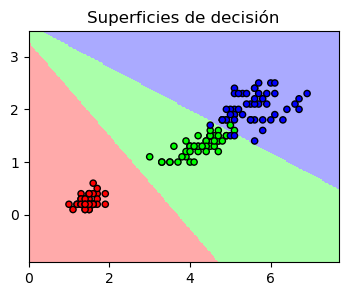

In [10]:
from matplotlib.colors import ListedColormap

def show_clf_surface(clf):
    # Grafiquemos las superficies de decisión
    h = .02  # step size in the mesh

    # Create color maps
    cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
    cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, x_max]x[y_min, y_max].
    x_min, x_max = X_train[:, 2].min() - 1, X_train[:, 2].max() + 1
    y_min, y_max = X_train[:, 3].min() - 1, X_train[:, 3].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.figure(figsize=(4,3))
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

    # Plot also the training points
    plt.scatter(X[:, 2], X[:, 3], c=y, cmap=cmap_bold,
                edgecolor='k', s=20)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title("Superficies de decisión")

    plt.show()
    
show_clf_surface(clf)

### Clasificador Cuadrático QDA:

Al igual que LDA se obtiene de suponer distribuciones Gaussianas sobre las probabilidades conjuntas; sin embargo, QDA asume que la matriz de covarianzas es igual para todas las clases, pero la varianza de cada dimensión es diferente.

Veamos como usar QDA en sklearn:


In [11]:
# Entrenemos solo con 2 características para ver las superficies de decisión
# Primero definimos el clasificador y sus parámetros
clf = discriminant_analysis.QuadraticDiscriminantAnalysis()

# Después ajustamos el clasificador a los datos de entrenamiento (aprendemos de los datos)
clf.fit(X_train[:,2:4], y_train)

# A continuación, usamos el clasificador entrenado para predecir la etiqueta de los datos de prueba
y_predicted = clf.predict(X_test[:,2:4])

# Ahora podemos calcular y ver la precisión del clasificador
acc = metrics.accuracy_score(y_test, y_predicted)
mat = metrics.confusion_matrix(y_test, y_predicted)

print ("Precisión del clasificador kNN: ",acc)
print ("Matriz de Confusión: \n", mat)

Precisión del clasificador kNN:  0.98
Matriz de Confusión: 
 [[15  0  0]
 [ 0 18  1]
 [ 0  0 16]]


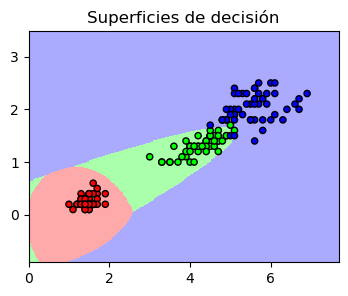

In [12]:
show_clf_surface(clf)

### Máquinas de Vectores de Soporte

Intuitivamente, una SVM es un modelo que representa a los puntos de muestra en el espacio, separando las clases a 2 espacios lo más amplios posibles mediante un hiperplano de separación definido como el vector entre los 2 puntos, de las 2 clases, más cercanos al que se llama vector soporte [Tomado de Wikipedia]. 

![Clasificador SVM_Mergen de Separación](imagenes/SVM_1.png)


Las SVM toman relevancia cuando los conjuntos de datos no son separables en el espacio dimensional de entrada. Para ello, las SVM usa un kernel para proyectar a un espacio de dimensionalidad muy alta (o incluso infinita) el conjunto de entrada y buscar en ese espacio multidimensional un hiperplano lineal que puede separar los datos, como ejemplifica la siguiente imagen:

![Clasificador SVM_Mergen de Separación](imagenes/SVM_2.png)

 Veamos como usar una SVM en sklearn:


In [13]:
# Entrenemos solo con 2 características para ver las superficies de decisión
# Primero definimos el clasificador y sus parámetros
# En este caso definimos una SVM con un kernel lineal y un margen de error de 0.5
clf_svm = svm.SVC(C=0.1, kernel="linear")

# Después ajustamos el clasificador a los datos de entrenamiento (aprendemos de los datos)
clf_svm.fit(X_train[:,2:4], y_train)

# A continuación, usamos el clasificador entrenado para predecir la etiqueta de los datos de prueba
y_predicted = clf_svm.predict(X_test[:,2:4])

# Ahora podemos calcular y ver la precisión del clasificador
acc = metrics.accuracy_score(y_test, y_predicted)
mat = metrics.confusion_matrix(y_test, y_predicted)

print ("Precisión del clasificador kNN: ",acc)
print ("Matriz de Confusión: \n", mat)

Precisión del clasificador kNN:  0.94
Matriz de Confusión: 
 [[15  0  0]
 [ 0 16  3]
 [ 0  0 16]]


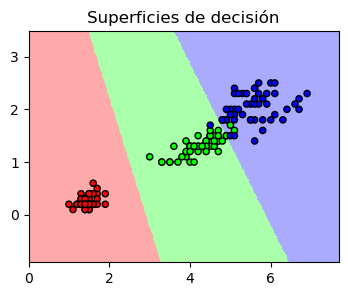

In [14]:
show_clf_surface(clf_svm)

## Métodos de Clasificación No Supervisada

El método de clasificación NO supervisada que más ampliamente se usa son los algoritmos de clustering, entre ellos, el algoritmo de k-means. Este algoritmo agrupa los objetos del conjunto de entrenamiento en k clusters. El agrupamiento se realiza a partir de un de similitud o dissimilutud que se define en términos de una función de distancia, como la Euclidiana o la distancia de Mahalanobis.

El algoritmo kmeans es un algoritmo iterativo que parte de unos centroides aleatorios, los cuales se van ajustando cada vez que se define cada punto del conjunto de entrenamiento a qué grupo pertenece. Dicha asignación se hace con base en la distancia que hay entre el punto y cada uno de los centroides. La siguiente imagen ilustra el proceso del algoritmo:

| ![kmeans_1](imagenes/kmeans_1.png) | ![kmeans_2](imagenes/kmeans_2.png) | ![kmeans_3](imagenes/kmeans_3.png) |
|---|---|---|
| ![kmeans_4](imagenes/kmeans_4.png) | ![kmeans_5](imagenes/kmeans_5.png) | ![kmeans_n](imagenes/kmeans_n.png) |


Veamos como usar este algoritmo en sklearn.

In [15]:
# Entrenemos solo con 2 características para ver las superficies de decisión
# Primero definimos el clasificador y sus parámetros
clf_kmeans = cluster.KMeans(n_clusters=3, init="random", max_iter= 20)

# Después ajustamos el clasificador a los datos de entrenamiento (aprendemos de los datos)
clf_kmeans.fit(X_train[:,2:4])

# A continuación, usamos el clasificador entrenado para predecir la etiqueta de los datos de prueba
y_predicted = clf_kmeans.predict(X_test[:,2:4])

# Ahora podemos calcular y ver la precisión del clasificador
acc = metrics.accuracy_score(y_test, y_predicted)
mat = metrics.confusion_matrix(y_test, y_predicted)

print ("Precisión del clasificador kNN: ",acc)
print ("Matriz de Confusión: \n", mat)

Precisión del clasificador kNN:  0.32
Matriz de Confusión: 
 [[15  0  0]
 [ 0  1 18]
 [ 0 16  0]]


<div style="padding:10px; border-radius:10px; border:2px solid #A43D39; background:#EEEEEE">
<span style="color:#A43D39"><h3>**Nota:**</h3></span> Tenga cuidado con la matriz de confusión dado que como es un algoritmo NO supervisado, las etiquetas puede que no coincidan!</div>

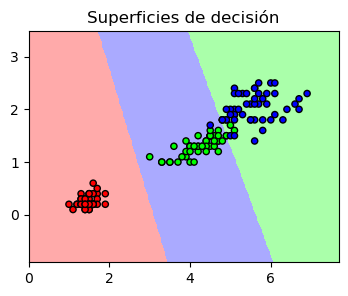

In [16]:
show_clf_surface(clf_kmeans)

## Validación Cruzada

La validación cruzada (cross-validation) es una técnica utilizada para evaluar los resultados de un clasificador y garantizar que son independientes de la partición del conjunto de datos en los conjuntos de entrenamiento y prueba.

Básicamente, la validación cruzada consiste en particionar el conjunto en k subconjuntos, de los cuales k-1 se usan para entrenar el clasificador y el conjunto restante se usa para validar el clasificador. Esta tarea se repite k veces. Al  final se calcula  el promedio de las medidas de evaluación sobre las diferentes particiones. La siguiente figura ilustra el proceso.

![Validacion Cruzada](imagenes/VC_wikipedia.jpg)

Imagen tomada de [Wikipedia](https://upload.wikimedia.org/wikipedia/commons/1/18/Esquema_castell%C3%A0.jpg)


Veamos como usar la validación cruzada empleando una SVM lineal:

In [25]:
scores = []

for train, test in model_selection.StratifiedKFold(n_splits=4, shuffle=True, random_state=1).split(X, y):
    X_train, y_train = X[train], y[train]
    X_test, y_test = X[test], y[test]
    clf_svm = svm.SVC(C=0.1, kernel="linear")
    clf_svm.fit(X_train, y_train)
    scores.append(metrics.accuracy_score(y_test, clf_svm.predict(X_test)))

print("CV Accuracy = %f +/- %f" % (np.mean(scores)*100, np.std(scores)*100))

CV Accuracy = 96.657183 +/- 1.191190


In [26]:
# Una versión más corta
scores = model_selection.cross_val_score(svm.SVC(C=0.1, kernel="linear"), X, y, 
                         cv = model_selection.StratifiedKFold(n_splits=4, shuffle=True, random_state=1), 
                         scoring = "accuracy")
print("CV Accuracy = %f +/- %f" % (scores.mean()*100, scores.std()*100))

CV Accuracy = 96.657183 +/- 1.191190


## Una forma de probar varios modelos 

Como no es posible saber qué algoritmos serán buenos para este problema, ni qué configuraciones utilizar. A partir de los gráficos, obtenemos una idea de que algunas de las clases son parcialmente linealmente separables en algunas dimensiones, por lo que en general esperamos buenos resultados.

A continuación, se muestra como entrenar y evaluar varios modelos al tiempo usando validación cruzada con el fin de comparar sus desempeños.

In [27]:
clfs = []
clfs.append(('LDA', discriminant_analysis.LinearDiscriminantAnalysis()))
clfs.append(('KNN', neighbors.KNeighborsClassifier(n_neighbors=3)))
clfs.append(('CART', tree.DecisionTreeClassifier()))
clfs.append(('NB', naive_bayes.GaussianNB()))
clfs.append(('SVM', svm.SVC(C=0.1, kernel="linear")))

results = []
names = []
seed = 1
for name, model in clfs:
    kfold = model_selection.StratifiedKFold(n_splits=4, shuffle=True, random_state=seed)
    scores = model_selection.cross_val_score(model, X, y, cv=kfold, scoring="accuracy")
    results.append(scores)
    names.append(name)
    msg = "%s: %f (+/- %f)" % (name, scores.mean()*100, scores.std()*100)
    print(msg)

LDA: 97.990754 (+/- 2.235807)
KNN: 95.981508 (+/- 2.361319)
CART: 93.972262 (+/- 2.974204)
NB: 95.288051 (+/- 4.006476)
SVM: 96.657183 (+/- 1.191190)


# Entregables de la práctica

Tenga en cuenta que se evalúa calidad del entregable, las explicaciones dadas, la redacción, la ortografía, así como la calidad del código (si es entendible, limpio, ordenado, bien comentado y no ha solo sido copiado y pegado de lo realizado por el profe).

### Entregable 1: Clasificación sin selección de características

Para el desarrollo de esta práctica se entregan tres conjuntos de datos:

- Tortillas: que es un conjunto con tres clases (que hacen referencia a 3 calidades de tortillas mexicanas. El conjunto de datos tiene 300 muestras en total para las que se han extraído 1643 características.

- Rostros, es un conjunto de datos con dos clases (cara/no-cara). Este conjunto tiene 264 muestras en total con 1589 características.

- Género: este conjunto tiene 2 clases (female/male), con un total de 610 muestras, cada una con 1589 características calculadas

A Desarrollar para cada conjunto de datos:
1. Cargue los archivos de los conjuntos de datos adjuntos (los datos ya están normalizados)
2. Divida el conjunto de datos en 2 subconjuntos: un conjunto con el 80% de las muestras de cada clase para el  entrenamiento (training) y otro con el 20% restante como conjunto de pruebas (testing). Esto lo puede hacer manualmente o puede utilizar la función <span style="background-color:#DDDDDD; color:blue; font-family:Courier new">model_selection.train_test_split</span> para hacer la partición. Es necesario hacer esto y no copiar y pegar lo implementado en la práctica ya que en este caso sólo se entrenará un clasificador y usted NO hará Validación Cruzada.
3. Entrene un clasificador (puede ser la SVM lineal usada en esta práctica) o puede usar un clasificador como el clasificador de vecinos más cercanos, kNN (<span style="background-color:#DDDDDD; color:blue; font-family:Courier new">neighbors.KNeighborsClassifier</span> de `sklearn`). El clasificador debe ser entrenado con los datos de entrenamiento de la partición del punto anterior.
4. Use el conjunto de prueba para evaluar el clasificador: muestre la precisión del mismo y la matriz de confusión.



In [ ]:
# Aquí el código de este entregable

import scipy.io

#Punto 1: Conjunto de datos de las Tortillas
mat = scipy.io.loadmat('datos/set04-tortillas.mat')

y = mat['d'] # Etiquetas de clase de los objetos
X = mat['f'] # Matriz de datos: 300 objetos (filas) x 1643 características (columnas)
Xn = mat['fn'] # Nombres de las características

# Aquí ya puede continuar usted ...

### Entregable 2: Clasificación con selección de características

A Desarrollar para cada conjunto de datos de entrenamiento:
1. Elimine las características irrelevantes y llame al conjunto de datos resultante X_train_1
2. Aplique el método de selección hacia atrás (en la sección selección recursiva de características) y cree un nuevo conjunto de datos con 100 características (llame a este conjunto X_train_2).
3. Sobre el conjunto resultante en el punto anterior, aplique el algoritmo de selección automática hacia atrás (en la sección selección automática del número de características). Cuántas características son relevantes para el conjunto de datos?
4. A partir de la selección anterior cree un nuevo conjunto de datos y llámelo (X_train_3)
5. Haga un análisis individual de las características del conjunto de datos resultante del punto anterior y seleccione de él las 10 menores características (llame a este nuevo conjunto de datos X_train_4). Cuáles son los nombres de las características seleccionas en este último paso?
5. Con base en la selección de los pasos 1, 2, 4 y 5, genere los conjuntos de datos de prueba X_test_1, X_test_2, X_test_3 y X_test_4.
6. Por cada conjunto de datos X_train_*, entrene un clasificador (Del mismo tipo usado en el entregable 1) y evalúe el mismo con el conjunto de datos de prueba correspondiente. muestre la precisión del mismo y la matriz de confusión.

In [ ]:
# Aquí el código de este entregable


### Entregable 3: Análisis de los resultados obtenidos

1. Grafique las 2 mejores características obtenidas en la última selección usando un scatter. Qué tan buenas son para cada conjunto de datos?
2. Con base en las matrices de confusión y la precisión de los clasificadores, qué conclusiones puede sacar?

In [ ]:
Escriba aquí su análisis con base en los resultados obtenidos